### 1. Import libraries

In [3]:
import os
import re
import string

import matplotlib.pyplot as plt
import nltk
import pandas as pd
import unidecode

nltk.download('punkt')
from nltk.stem import  SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import tensorflow as tf
print('TF version', tf.__version__)

import ktrain
#Display every call in output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
TF version 2.4.1


### 2. Read data

In [21]:
data_path = 'Data'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
df = pd.read_csv(os.path.join(data_path, 'db_responses.csv'))
df = df.rename(columns={'1. Ce vă nemulțumește la sistemul fiscal românesc?': 'nemultumiri_sist_fiscal', 
                        '2. Dacă ați fi ministrul finanțelor publice ce ați schimba la sistemul fiscal românesc?': 'schimbari_sist_fiscal', 
                        '3. În opinia dumneavoastră, ce vă oferă sistemul fiscal actual?': 'ce_ofera_sistemul'})
df.head()

,nemultumiri_sist_fiscal,schimbari_sist_fiscal,ce_ofera_sistemul
0,- injustetea sociala\n- impunerea excesiva\n- ...,as incerca sa-l orientez spre cetatean.,- crestere a nivelului de trai in mod semi-efi...
1,Ineficiența utilizării sumelor de bani strânse...,Aș crea un mediu de afacere stabil.,Birocrație excesivă.
2,"Organizarea probabil deficitara,\nCircuitul lu...",Din postura mea de acum imi este greu sa dau u...,"Un trai decent, servicii sociale intre mediocr..."
3,Nu prea am incredere in sistem.,Nu prea stiu ce as schimba dar as face ceva in...,Nu stiu
4,Fiscalitatea din Romania e plina de contradictii,Simplificarea legislatiei si a raportarilor fi...,Proceduri complicate....


In [19]:
df.shape

(710, 3)

### 3.Preprocess data

In [33]:
# ro_stopwords = set(stopwords.words('romanian'))
ro_stopwords = pd.read_csv(data_path + '/stopwords-ro.txt')
stemmer = SnowballStemmer(language="romanian")
punctuation_signs= [c for c in string.punctuation] + ['``', "''", '...', '..']

In [34]:
# Clean the text
def clean_text(raw_string):
    # replace new line
    cleaned_string = re.sub('\n', ' ', raw_string)
    # remove emoji
    emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              # "^a-zA-Z"
                              "]+", flags=re.UNICODE)
    cleaned_string = emoji_pattern.sub(r'', cleaned_string)
    # lower all letters
    cleaned_string = cleaned_string.lower()
    # tokenize strings
    cleaned_string = nltk.word_tokenize(cleaned_string)
    # remove stopwords and punctuation signs
    cleaned_string = [word.strip() for word in cleaned_string if word not in ro_stopwords and len(word)>3]
    cleaned_string = [word.strip() for word in cleaned_string if word not in punctuation_signs ]
    # stem the words - reduce words to stema
    cleaned_string = [stemmer.stem(word.strip()) for word in cleaned_string if word]
    cleaned_string = ' '.join(cleaned_string)
    # all lower
    cleaned_string = unidecode.unidecode(cleaned_string)
    # remove special characters
    cleaned_string = re.sub("[^A-Za-z ]", " ", cleaned_string, re.I)
    # remove multiple spaces
    cleaned_string = re.sub(' +', ' ', cleaned_string)
    return cleaned_string

In [35]:
df["nemultumiri_sist_fiscal_prep"] = df["nemultumiri_sist_fiscal"].apply(lambda x: clean_text(x))
df["schimbari_sist_fiscal_prep"] = df["schimbari_sist_fiscal"].apply(lambda x: clean_text(x))
df["ce_ofera_sistemul_prep"] = df["ce_ofera_sistemul"].apply(lambda x: clean_text(x))
df.head(2)

,nemultumiri_sist_fiscal,schimbari_sist_fiscal,ce_ofera_sistemul,nemultumiri_sist_fiscal_sentiment,schimbari_sist_fiscal_sentiment,ce_ofera_sistemul_sentiment,nemultumiri_sist_fiscal_prep,schimbari_sist_fiscal_prep,ce_ofera_sistemul_prep
0,- injustetea sociala\n- impunerea excesiva\n- ...,as incerca sa-l orientez spre cetatean.,- crestere a nivelului de trai in mod semi-efi...,0,0,0,injustet social impun exces privileg car rezer...,incerc sa l orient spre cetatean,crest nivel tra semi eficient sustin insuficie...
1,Ineficiența utilizării sumelor de bani strânse...,Aș crea un mediu de afacere stabil.,Birocrație excesivă.,0,1,0,ineficient utilizar sum ban stran tax impoz,cre mediu afac stabil,birocrat exces


In [36]:
df['nemultumiri_sist_fiscal'].value_counts()[:20]

-                                                                                                          25
Nimic                                                                                                      21
Taxele si impozitele                                                                                        6
Coruptia                                                                                                    5
Țara noastră are una dintre cele mai reduse cote din Europa la impozitul pe venitul persoanelor fizice.     4
Prea multe taxe                                                                                             4
Transparenta                                                                                                4
Prea multe taxe și impozite                                                                                 4
.                                                                                                           4
Tot       

In [37]:
df['schimbari_sist_fiscal'].value_counts()[:20]

-                        22
Nimic                    14
Nu stiu                   5
Transparenta              4
Nu                        4
Totul                     4
Tot                       3
.                         3
Multe                     3
Taxele si impozitele      3
Taxele                    3
L-as simplifica           2
Taxele si impozitele      2
multe                     2
Nimic                     2
Mai putine taxe           2
...                       2
Nu știu                   2
Nu știu.                  2
..                        2
Name: schimbari_sist_fiscal, dtype: int64

In [38]:
df['ce_ofera_sistemul'].value_counts()[:20]

-                    33
Nimic                30
Nimic.                7
Nesiguranta           7
nimic                 6
.                     5
Nu stiu               4
servicii publice      4
Nu prea multe         4
Siguranta             4
Nimic                 3
Incredere             3
Instabilitate         3
..                    3
Servicii publice      3
Taxe si impozite      3
Servicii publice.     3
.                     3
...                   3
Nu prea multe.        3
Name: ce_ofera_sistemul, dtype: int64

### 4.Word frequency and word clouds

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Worcloud of top 50 words in answers for nemultumiri_sist_fiscal_prep')

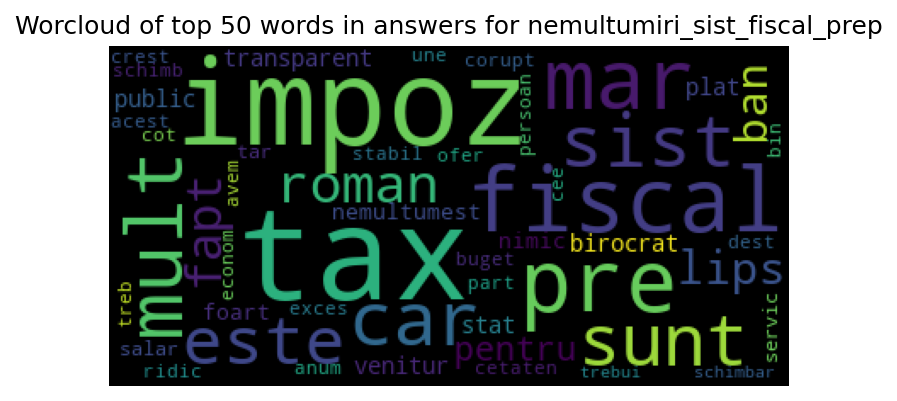

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Worcloud of top 50 words in answers for schimbari_sist_fiscal_prep')

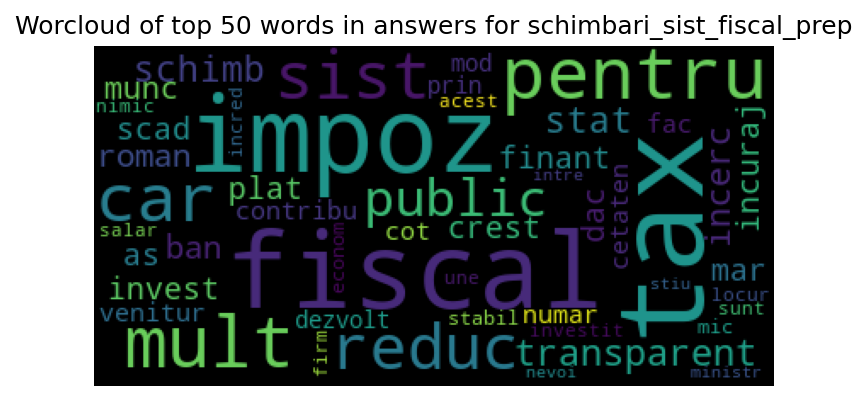

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Worcloud of top 50 words in answers for ce_ofera_sistemul_prep')

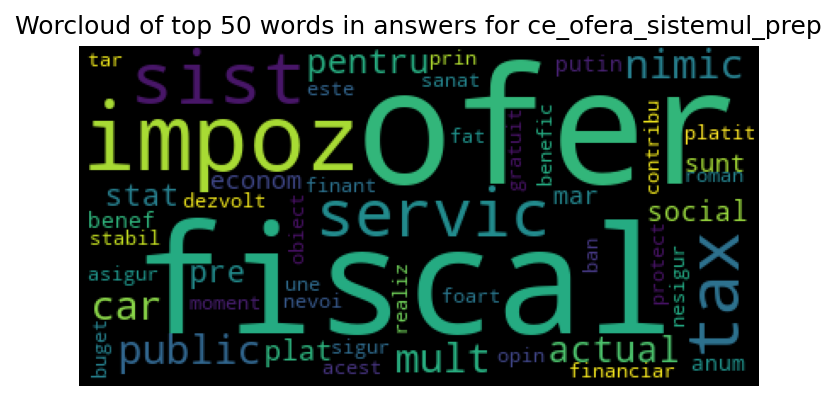

In [46]:
# Create dtm (document term matrix) for most frequent 5000 words
for question in ['nemultumiri_sist_fiscal_prep', 'schimbari_sist_fiscal_prep', 'ce_ofera_sistemul_prep']:
  question_series = df[question]
  vec_answers = CountVectorizer(max_features=5000)
  counts_per_answer = vec_answers.fit_transform(question_series)

  answer_words = vec_answers.get_feature_names()

  dtm_answers = pd.DataFrame(counts_per_answer.toarray(), columns = answer_words)
  wordcloud_freq_answers = dtm_answers.sum(axis=0) #0 actioneaza pe toate randurile pe fiecare coloana, 1-invers

  wordcloud_answers = WordCloud(max_words=50, background_color = 'black', colormap = None)
  wordcloud_answers.generate_from_frequencies(wordcloud_freq_answers)
  fig = plt.figure(figsize=(6, 3), dpi=150)

  plt.imshow(wordcloud_answers)
  plt.axis('off')
  plt.title(f"Worcloud of top 50 words in answers for {question}")
  plt.show()
  fig.savefig(os.path.join(data_path, f'{question}_word_cloud.png'))

### 5.Sentiment prediction

Load pre-trained BERT predictor and predict sentiment for new texts

In [24]:
predictor = ktrain.load_predictor(os.path.join(data_path, 'Models', "bert_predictor"))
# Prediction model taken from https://github.com/stefanacioban/romanian_sentiment_predictor

In [25]:
to_predict = ["La sitemul fiscal romanesc ma nemultumeste birocratia.", 
        "Imi place la nebunie!"]
a = predictor.predict("La sitemul fiscal romanesc ma nemultumeste birocratia.")

In [27]:
def predict_row_bert(row):
    prediction = predictor.predict(row)
    if prediction == 'not_label':
        prediction_value = 0
    else:
        prediction_value = 1
    return prediction_value

In [28]:
# We'll create a sentiment score column for each question in the questionnaire:
for column in df.columns:
    df[f'{column}_sentiment'] = df[column].apply(lambda x: predict_row_bert(x))

In [29]:
df.head(2)

,nemultumiri_sist_fiscal,schimbari_sist_fiscal,ce_ofera_sistemul,nemultumiri_sist_fiscal_sentiment,schimbari_sist_fiscal_sentiment,ce_ofera_sistemul_sentiment
0,- injustetea sociala\n- impunerea excesiva\n- ...,as incerca sa-l orientez spre cetatean.,- crestere a nivelului de trai in mod semi-efi...,0,0,0
1,Ineficiența utilizării sumelor de bani strânse...,Aș crea un mediu de afacere stabil.,Birocrație excesivă.,0,1,0


In [40]:
df.to_csv(os.path.join(data_path, 'sentiment_responses.csv'), index=False)

In [31]:
df.describe()

,nemultumiri_sist_fiscal_sentiment,schimbari_sist_fiscal_sentiment,ce_ofera_sistemul_sentiment
count,710.000000,710.000000,710.000000
mean,0.233803,0.409859,0.471831
std,0.423547,0.492154,0.499558
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000
